# TP4 : Différences finies pour les équations paraboliques

In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

/home/jules/.venv/main/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Commandes utiles : `np.eye(N,N)`

| | |
|-|-|
| `np.array((n, p))` | Définit une matrice 2D dans $\mathcal{M}_{n,p}(\mathbb{R})$ |
| `np.ones((2,3))`, ou `np.zeros((2,3))` | Définit une matrice 2D dans $\mathcal{M}_{2,3}(\mathbb{R})$ remplie de 1, ou 0 |
| `A[2,:]` (ou `A[:,2]` ) | Renvoie la 3e ligne (ou colonne) de la matrice `A` (comme vecteur 1D) |
| `max(abs(x))` |  calcule $\max_{i=1,...,N} \lvert x_i \rvert$ |
| `np.diagflat( vect, k )` | crée une matrice carrée de dimension len(vect)+|k| avec les éléments du vecteur vect sur la k-diagonale |
| `np.eye(N,N)`| crée la matrice Identité dans $\mathcal{M}_{N}(\mathbb{R})$

Dans ce TP, on s'intéresse à la résolution de l'équation parabolique suivante :

\begin{equation}
  \begin{cases}
  u_t (x,t) - u_{xx} (x,t) + u(x,t) = f(x) & (x,t)\in]0,1[ \times  ]0,1]\\
  u(x,0) = 0 & x\in ]0,1[\\
    u(0,t) = u(1,t) = 0 & t \in ]0,1].
    \end{cases}
     \tag{P}
\end{equation}

On peut facilement vérifier que si $f(x,t) = \sin(\pi x)$, la fonction

$$
  u(x,t) = \left(1-e^{-(1+\pi^2)t}\right) \frac{1}{1+\pi^2} \sin(\pi x)
$$

est solution de (P).

On va chercher une solution approchée de (P) en utilisant différentes méthodes : Euler explicite, Euler implicite et la $\theta$-méthode. 

**(0)** Ecrire une fonction python `solex(x,t)` qui calcule la solution exacte de (P) et la tracer.

In [3]:
def solex(x,t):
    return (1 - np.exp(-(1 + np.pi**2)*t)) * np.sin(np.pi * x) /(1 + np.pi**2)


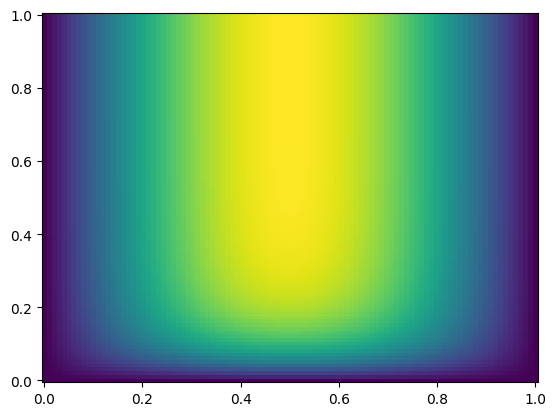

In [40]:
x = np.linspace(0, 1, 100)
t = np.linspace(0, 1, 100)
X, T = np.meshgrid(x, t)
U = solex(X,T)
plt.pcolormesh(X, T, U)

## Schéma d'Euler explicite

Étant donnés deux entiers $N, T\in \mathbb{N}^*$, on pose $h= 1/(N+1)$ et $x_i = ih$,
$k = 1/J$ et $t_j = jk$. Le but est encore une fois de calculer des valeurs d'approximation $u_i^j \approx u(x_i,t_j)$, pour $i=0,1,\cdots, N+1$  et $j=0,1,\cdots, J$.
On considère le schéma explicite, défini par

\begin{equation}
    \begin{cases}
      \displaystyle \frac{u^{j+1}_i-u^j_i}{k} - \frac{u^j_{i+1}-2u^j_i+u^j_{i-1}}{h^2} + u_i^j= f(x_i)
    &i =1,\dots, N\;\; j = 1,\dots, T\\
      u_i^0 = 0 &i = 1,\cdots, N \\
      u_0^j = u_{N+1}^j = 0  &j = 0, \dots, J.
    \end{cases}
    \tag{EE}
\end{equation}
\begin{equation}
    \begin{cases}
      \displaystyle u^{j+1}_i = k f(x_i) - k (u_i^j - \frac{u^j_{i+1}-2u^j_i+u^j_{i-1}}{h^2}) + u^j_i
    &i =1,\dots, N\;\; j = 1,\dots, T\\
      u_i^0 = 0 &i = 1,\cdots, N \\
      u_0^j = u_{N+1}^j = 0  &j = 0, \dots, J.
    \end{cases}
    \tag{EE}
\end{equation}
Les inconnues sont donc les valeurs $u^j_1, u^j_2,\ldots,u^j_N$, pour $i=1,\cdots,N$ et $j=1,\cdots, J$.
À chaque pas de temps, on notera le vecteur inconnu  $ U^j=(u_0^j,u^j_1,\ldots,u^j_N,u_{N+1}^j)^T. $

**(1)** Écrire une fonction `matrice_EE(N,fct)` qui prend en argument le nombre de points `N` et une fonction `fct` et qui renvoie la matrice $A_h$ et le vecteur $F_h$ tels que le système discret (EE) s'écrit sous forme vectorielle

\begin{equation}
\left\{	\begin{array}{ll}
U^{j+1} = (I- k A_h) U^j + k F_h &   j = 1,\cdots, J\\
		  	\nonumber  U^0 = 0. &
 		\end{array} \right.
	\end{equation}
    
   

In [20]:
def matrice_EE(N,fct):
    h = 1/(N+1)
    
    # matrice diagonale 
    
    
    vect0 = np.ones(N+2)* (1 + 2/(h**2))
    A0 = np.diagflat(vect0, 0)
    
    

    vect1 = np.ones(N+1) * (-1/(h**2))
    # matrice supérieure
    A1 = np.diagflat(vect1, 1)
    
    # matrice inférieure
    A2 = np.diagflat(vect1, -1)


    Ah = A0 + A1 +A2 
    Ah[0,0] = 0
    Ah[0,1] = 0
    Ah[N+1,N] = 0
    Ah[N+1,N+1] = 0
    # Fh
    Fh = np.zeros((N+2,1))
    Fh[1:N,0] = fct(np.linspace(0,1,N+1)[1:N])
    Fh[0,0] = 0
    Fh[-1,0] = 0

    

    return Ah, Fh

In [21]:
matrice_EE(4,lambda x : 0)

(array([[  0.,   0.,   0.,   0.,   0.,   0.],
        [-25.,  51., -25.,   0.,   0.,   0.],
        [  0., -25.,  51., -25.,   0.,   0.],
        [  0.,   0., -25.,  51., -25.,   0.],
        [  0.,   0.,   0., -25.,  51., -25.],
        [  0.,   0.,   0.,   0.,   0.,   0.]]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]))

**(2)** Écrire une fonction `EulerEx(u0, N,J,fct)` qui résoud (EE) et renvoie le vecteur `[x,h,k,U]` où `x` est la discrétisation en espace, `h` et `k` les pas d'espace et de temps et `U` une matrice de taille $(N+2)\times (J+1)$ telle que $U[i,j] \approx u(x_i , t_j)$. Tracer la solution.

In [52]:
def EulerEx(u0,N,J,fct):
    x = np.linspace(0, 1, N+2)
    t = np.linspace(0, 1, J+1)
    h = 1/(N+1)
    k = 1/J

    Ah,Fh = matrice_EE(N,fct)

    U = np.zeros((N+2,J+1))
    U[:,0] = u0(np.linspace(0,1,N+2))
    for t in range(J):
        breakpoint()
        U[:,t+1] = ((np.identity(N+2) - k * Ah)@U[:,t][:,None] + k * Fh)[:,0]
        
    return x, h,k,U
    

In [80]:
N = 10
J = 2 * (N+1)**2
x,h,k,U = EulerEx(lambda x : 0,N,J,lambda x : np.sin(np.pi*x))

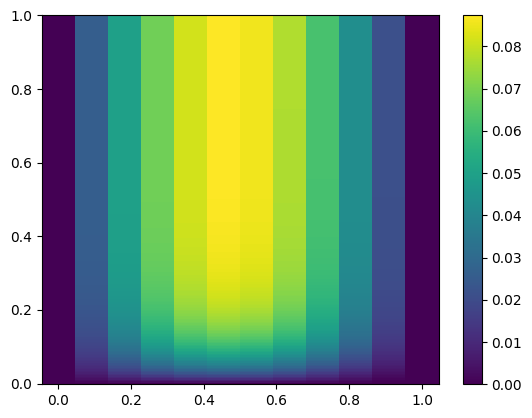

In [81]:
t = np.linspace(0, 1, J+1)
X, T = np.meshgrid(x, t)
plt.pcolormesh(X, T, U.T)
plt.colorbar()

**(5)** Que se passe-t-il si la CFL $k \leq \frac{h^2}{2}$ n'est pas satisfaite ?

Le schéma n'est pas stable

**(4)** Calculer pour différentes valeurs de $N$ et $J = 2(N+1)^2$ (pour assurer la condition CFL) l'erreur 

$$
E(N,J)= \max_{1\le j\le J} \left\| U^j - \Pi_h(u(t_j,\cdot)) \right\|_\infty
$$

et afficher les résultats. On rappelle que, selon la théorie, on devrait obtenir

$$
E(h,h^2) \simeq C h^2.
$$

## Schéma d'Euler implicite

On considère encore une fois (P), mais on s'intéresse maintenant à trouver une approximation de sa solution avec la méthode d'Euler implicite.

Étant donnés deux entiers $N, J\in\mathbb{N}^*$, on pose $h= 1/(N+1)$ et $x_i = ih$, $k = 1/J$ et $t_j = jk$. Le but est encore une fois de calculer des valeurs d'approximation $u_i^j\approx u(x_i,t_j)$, pour $i=0,1,\cdots, N+1$  et $j=0,1,\cdots, J$.

On considère  le schèma implicite, défini par

\begin{equation} 
	\begin{cases}
	  \displaystyle \frac{u^{j+1}_i-u^j_i}{k} - \frac{u^{j+1}_{i+1}-2u^{j+1}_i+u^{j+1}_{i-1}}{h^2} + u_i^{j+1}= f(x_i)
	 &i =1,\dots, N\;\; j = 1,\dots, J\\
	  u_i^0 = 0 &i = 1,\dots, N \\
	  u_0^j = u_{N+1}^j = 0  &j = 0, \dots, J.
	\end{cases}
\end{equation}

Les inconnues sont donc les valeurs $u^j_1, u^j_2,\ldots,u^j_N$, pour $i=1,\cdots,N$ et $j=1,\cdots, J$.
À chaque pas de temps, on notera le vecteur inconnu  $ U^j=(u_0^j,u^j_1,\ldots,u^j_N,u_{N+1}^j)^T. $

**(1)** Définir sous Python les matrices telles que le système discret (EI) s'écrit sous forme vectorielle

\begin{equation}
		\left\{	\begin{array}{ll}
			(I+ k A_h) U^{j+1} =  U^j + k F_h &   j = 1,\dots, J\\
		  	\nonumber  U^0 = 0. &
 		\end{array} \right.
\end{equation}
    
On remarque que dans ce cas la matrice $A$ est la même matrice que celle obtenue pour le schéma explicite.

In [ ]:
def matrice_EI(h,fct):
    h = 1/(N+1)
    
    # matrice diagonale 
    
    
    
    A0 = np.diagflat(vect0, 0)
    
   
    
    # matrice supérieure
    A1 = np.diagflat(vect1, 1)
   
    
    # matrice inférieure
    A2 = np.diagflat(vect1, -1)
   


    Ah = A0 + A1 +A2 
    
    # Fh
    
    return Ah, Fh

**(2)** Écrire une fonction `EulerIm(u0, N,J,fct)` qui résoud (EI) et renvoie le vecteur `[x,h,k,U]` où `x` est la discrétisation en espace, `h` et `k` les pas d'espace et de temps et `U` une matrice de taille $(N+2)\times (J+1)$ telle que $U[i,j] \approx u(x_i , t_j)$. Tracer la solution.

In [ ]:
def EulerIm(u0,N,J,fct):
    
    
    return x, h,k,U

**(3)** Erreur

In [ ]:
## Erreur par rapport à h



In [ ]:
## Erreur par rapport à h



## La $\theta$-méthode

Les schéma d'Euler explicite et implicite soufrent d'un problème commun : l'ordre de discrétisation temporel et inférieur à l'ordre en espace. On considère ici une méthode, inspirée à la méthode des trapèzes, qui pose une intéressante solution à ce problème.

On considère encore une fois (P). Étant donnés deux entiers $N, J\in\mathbb{N}^*$, on pose $h= 1/(N+1)$ et $x_i = ih$, $k = 1/J$ et $t_j = jk$. Le but est encore une fois de calculer des valeurs d'approximation $u_i^j\approx u(x_i,t_j)$, pour $i=0,1,\dots, N+1$  et $j=0,1,\dots, J$.\\

Pour $\theta \in [0,1]$, on considère le schéma suivant,  

\begin{equation} 
	\begin{cases}
	  \begin{aligned}
	  \frac{u^{j+1}_i-u^j_i}{k} - & \theta \left( \frac{u^{j+1}_{i+1}-2u^{j+1}_i+u^{j+1}_{i-1}}{h^2} + u_i^{j+1} \right) \\
	  - &(1- \theta)\left( \frac{u^j_{i+1}-2u^j_i+u^j_{i-1}}{h^2} + u_i^{j} \right) =  \theta f(x_i,t_{j+1}) + (1- \theta) f(x_i,t_{j})
	  \end{aligned}
	 &i =1,\dots, N\;\; j = 1,\dots, J\\
	  u_i^0 = 0 &i = 1,\dots, N \\
	  u_0^j = u_{N+1}^j = 0  &j = 0, \dots, J,
	\end{cases}
\end{equation}

Les inconnues sont donc les valeurs $u^j_1, u^j_2,\dots,u^j_N$, pour $i=1,\dots,N$ et $j=1,\dots, J$.
À chaque pas de temps, on notera le vecteur inconnu  $ U^J=(u_0^J,\dots,u^J_N,u_{N+1}^J)^T. $

**(1)**  Définir sous Python les matrices telles que le système discret ($\theta$-M) s'écrit sous forme vectorielle

\begin{equation}
		\left\{	\begin{array}{ll}
			\left(I+ k\theta A_h\right) U^{j+1} =  \left(I - (1-\theta)k A_h\right) U^j + k  F_h &   j = 1,\dots, J\\
		  	\nonumber  U^0 = 0. &
 		\end{array} \right.
\end{equation}

On remarque que dans ce cas la matrice $A_h$ est la même matrice obtenue pour le schéma explicite.

In [ ]:
def theta_methode(u0,N,J,theta, fct):
    
    
    return x, h,k,U

**(2)** On s'intéresse maintenant au cas particulier $\theta = \frac 12$. Ce schéma s'appelle le schéma de Crank Nicolson. Calculer pour différentes valeurs de $h$ et $k$ l'erreur 

$$ 
E(h,k)= \max_{1\le n\le T} \left\| U^n - \Pi_h(u(t_n,\cdot)) \right\|_\infty
$$

et afficher les résultats. On peut montrer que

$$
E(h,k) \simeq C (h^2 + k^2)
$$

sans conditions de stabilité.


In [ ]:
# erreur en fonction du pas de temps



In [ ]:
# erreur en fonction du pas de temps

